# Práctico 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Read the data from the CSV file
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Columnas:
+ **Identificatorios**: `show_id`
+ **Caracteristicas**: `type`,`title`, `duration`,`description`
+ **Fechas**: `date_added`, `release_year`
+ **Otros**: `director`, `cast`, `country`, `rating`, `listed_in`

In [ ]:
replace_dict = {
    'International TV Shows': 'Int. Shows',
    'Korean TV Shows': 'Korean Shows',
}       

Text(0.5, 0, 'Genres')

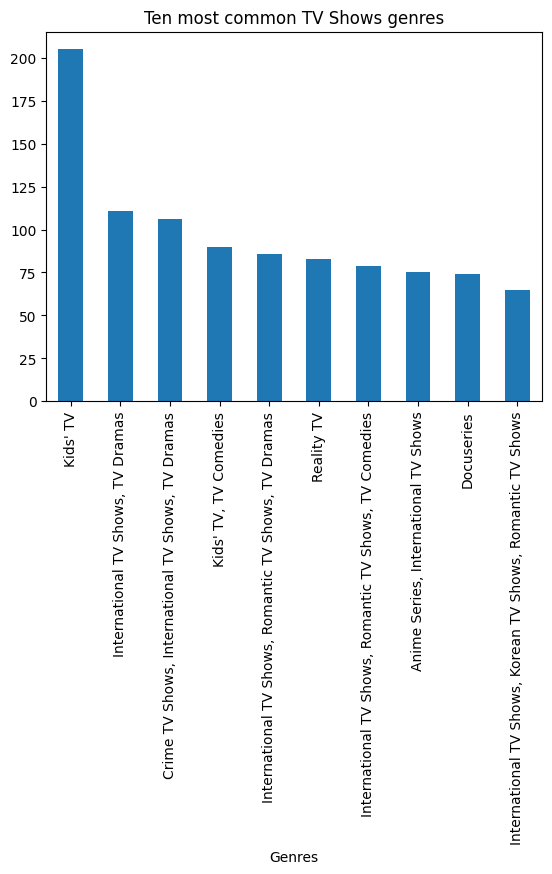

In [11]:
#within the type = 'TV Show', find the most common listed_in and plot it in a bar chart
df_tv = df[df['type'] == 'TV Show']
df_tv['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title('Ten most common TV Shows genres')